### <p style="text-align: center;">Community Segmentation</p>
# <p style="text-align: center;">Mall Customer Analysis</p>
#### <p style="text-align: center;">Jeffrey D Nelson and David N Campbell</p>

The purpose of this notebook is to use K-Means clustering to analyze different segments of Mall customers and determine what marketing strategy is best for each segment.

## Data Exploration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(r'data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As we can see, there are four relevant features:
1. Gender: customer gender identity
2. Age: customer age in number of years
3. Annual Income: customer yearly income measured in thousands of dollars
4. Spending Score: score assigned by mall based on behavior and nature of spending

Since the number of features is small, we can avoid performing Principal Component Analysis on this data set. Before we can do K-Means, though, we need to explore the relationships between these features.

### Feature Relationships

First, let's compare Gender Identity to other features to determine if there is any correlation.

<Figure size 432x288 with 0 Axes>

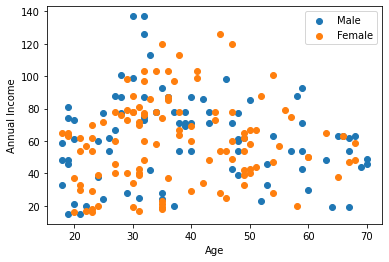

In [3]:
# Plot Gender vs Annual Income and Age

plt.clf()
fig = plt.figure()
ax = plt.gca()
for gender in ['Male' , 'Female']:
    ax.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender], label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

In [4]:
male_spending_score = df[df['Gender'] == 'Male']['Spending Score (1-100)']
print('Male Spending Score')
print(male_spending_score.describe())
print()

print('Female Spending Score')
female_spending_score = df[df['Gender'] == 'Female']['Spending Score (1-100)']
print(female_spending_score.describe())

Male Spending Score
count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: Spending Score (1-100), dtype: float64

Female Spending Score
count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


#### Analysis

Clearly, Gender Identity does not provide much in the way of differentiation. Therefore, we decided to omit it from future training in this model.

Text(0.5, 0, 'Age')

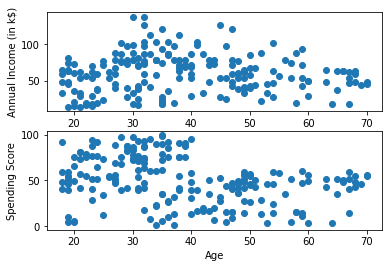

In [5]:
# Age vs Annual Income, Age vs Spending Score

plt.subplot(211)
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.ylabel('Annual Income (in k$)')

plt.subplot(212)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.ylabel('Spending Score')
plt.xlabel('Age')

Age is not very highly correlated with Annual Income or Spending Score. Let's compare Annual Income to Spending Score.

Text(0, 0.5, 'Annual Income (k$)')

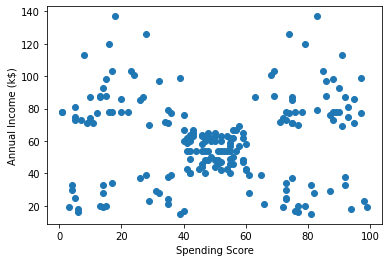

In [6]:
# Annual Income vs Spending Score

plt.clf()
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')

#### Analysis

Annual Income and Spending Score result in a strong grouping on their own. Let's use K-Means to cluster this relationship and see what information we can derive.

## K-Means

In [7]:
from sklearn.cluster import KMeans

columns = ['Spending Score (1-100)', 'Annual Income (k$)']
X = df[columns].iloc[: , :].values

Visually, five clusters seems like the optimal number of this two-dimensional data set. Let's confirm this using silhouette scores, though.

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters = [ i for i in range(2, 10) ]

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.predict(X))
    print("Silhouette score for {num} clusters: {score}".format(num=i, score=score))
    silhouette_scores.append(score)

Silhouette score for 2 clusters: 0.2968969162503008
Silhouette score for 3 clusters: 0.46761358158775435
Silhouette score for 4 clusters: 0.4931963109249047
Silhouette score for 5 clusters: 0.553931997444648
Silhouette score for 6 clusters: 0.53976103063432
Silhouette score for 7 clusters: 0.5264283703685728
Silhouette score for 8 clusters: 0.4564394045323282
Silhouette score for 9 clusters: 0.4565077334305076


Text(0, 0.5, 'Number of Clusters')

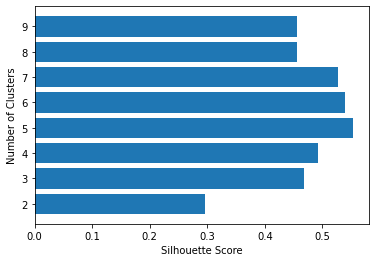

In [9]:
# Plot silhouette score
plt.figure()
plt.barh(clusters, silhouette_scores)
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Clusters')

Five clusters is clearly the optimal number for these features. Let's create a model and visualize the cluster centers.

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

Text(0, 0.5, 'Annual Income (k$)')

<Figure size 432x288 with 0 Axes>

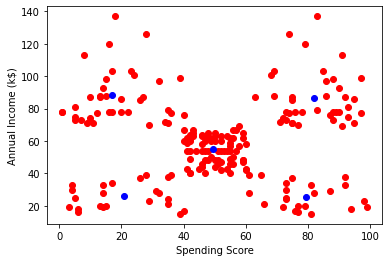

In [11]:
plt.clf()
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], color='red')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='blue')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')

In [12]:
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
df_centers

,Spending Score (1-100),Annual Income (k$)
0,49.518519,55.296296
1,82.128205,86.538462
2,79.363636,25.727273
3,20.913043,26.304348
4,17.114286,88.200000


In [13]:
# Show number of individuals in each group:
groups = [0 for i in range(5)]
predictions = kmeans.predict(X)
for p in predictions:
    groups[p] += 1
    
for i, g in enumerate(groups):
    print("Individuals in cluster %d: %d" % (i, g))

Individuals in cluster 0: 81
Individuals in cluster 1: 39
Individuals in cluster 2: 22
Individuals in cluster 3: 23
Individuals in cluster 4: 35


#### Analysis

Before we characterize these groups, let's run K-Means with Age and see what type of clusters we form.

### K-Means (Again)

In [14]:
columns = ['Spending Score (1-100)' , 'Annual Income (k$)', 'Age']

X = df[columns].iloc[: , :].values
clusters = [ i for i in range(2, 10) ]

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.predict(X))
    print("Silhouette score for {num} clusters: {score}".format(num=i, score=score))

Silhouette score for 2 clusters: 0.293166070535953
Silhouette score for 3 clusters: 0.3839349967742105
Silhouette score for 4 clusters: 0.40546302077733304
Silhouette score for 5 clusters: 0.44446409171786105
Silhouette score for 6 clusters: 0.4523443947724053
Silhouette score for 7 clusters: 0.43509714214250295
Silhouette score for 8 clusters: 0.42790288922594905
Silhouette score for 9 clusters: 0.41197801912451715


The clustering here is not as tight as it was above. Let's print the cluster centers for the optimal number of groups, 6. 

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

df_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
df_centers

,Spending Score (1-100),Annual Income (k$),Age
0,17.285714,88.228571,41.685714
1,49.088889,53.377778,56.155556
2,49.131579,56.657895,27.000000
3,79.363636,25.727273,25.272727
4,19.523810,25.142857,44.142857
5,82.128205,86.538462,32.692308


In [16]:
# Show number of individuals in each group:
groups = [0 for i in range(6)]
predictions = kmeans.predict(X)
for p in predictions:
    groups[p] += 1

for i, g in enumerate(groups):
    print("Individuals in cluster %d: %d" % (i, g))

Individuals in cluster 0: 35
Individuals in cluster 1: 45
Individuals in cluster 2: 38
Individuals in cluster 3: 22
Individuals in cluster 4: 21
Individuals in cluster 5: 39


## Marketing Analysis

From our two models, it is clear that the strongest grouping is with respect to Annual Income and Spending Score. This creates the following clusters:
1. Those with low income and low spending score.
2. Those with low income and high spending score.
3. Those with medium income and medium spending score.
4. Those with high income and low spending score.
5. Those with high income and high spending score.

The largest cluster is the group with medium income and medium spending score.

Age does not really add much to the clustering. However, it may be that some products sell better to different age groups or gender identities. Therefore, we would recommend the following to our marketing department:
* To those with high income and high spending score, market occasionally. They are highly likely to purchase even
  without marketing, and they can afford the items.
* To those with low income and low spending score, do not waste resources marketing to.
* To those with medium to high income and medium to low spending score, we need a more targeted strategy,     
  especially since this is the largest group:
  - Market aggressively with a focus on products that sell.
  - If a product is known to sell well to a specific gender identity or age group, push it hardest in this cluster
    as the payoff is largest. The high spending score group will probably already buy it without much marketing.